In [1]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import imageio
from datetime import datetime
# import cartopy.crs as ccrs

In [2]:
def timestring(time):
    return datetime.fromtimestamp(time).strftime('%Y-%m-%d %H:%M:%S')

In [4]:
f = netCDF4.Dataset('data/cdl/gyaros.cdl')
print(f) 

OSError: [Errno -51] NetCDF: Unknown file format: 'data/cdl/gyaros.cdl'

In [3]:
f = netCDF4.Dataset('data/med-hcmr-wav-rean-h_1702801153952_n5.nc')
print(f) 

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    bulletin_type: reanalysis
    institution: Hellenic Centre for Marine Research (HCMR)- Athens,Greece
    source: MEDWAM3
    credit: Copernicus Marine Environment Monitoring Service (CMEMS)
    contact: servicedesk.cmems@mercator-ocean.eu
    producer: CMEMS-MED Monitoring and Forecasting Centre
    references: Please check in CMEMS catalogue the INFO section for product MEDSEA_MULTIYEAR_WAV_006_012 - http://marine.copernicus.eu
    comment: Please check in CMEMS catalogue the INFO section for product MEDSEA_MULTIYEAR_WAV_006_012 - http://marine.copernicus.eu
    Conventions: CF-1.6
    area: MED
    bulletin_date: 2022-06-01
    FROM_ORIGINAL_FILE__field_type: hourly_instantaneous_at_time_field
    title: Wave fields (2D) - Hourly Instantaneous
    _CoordSysBuilder: ucar.nc2.dataset.conv.CF1Convention
    history: Data extracted from dataset http://localhost:8080/thredds/dodsC/med-hcmr

In [4]:
print(f.variables.keys()) # get all variable names
print('-----')
temp = f.variables['VHM0_WW']  # temperature variable
print(temp) 

dict_keys(['VHM0_WW', 'latitude', 'VMDR_SW2', 'VMDR', 'VMDR_SW1', 'VTM10', 'VPED', 'VTPK', 'VTM02', 'VHM0_SW1', 'VMDR_WW', 'VTM01_SW2', 'VSDX', 'VTM01_SW1', 'VSDY', 'time', 'VHM0', 'VTM01_WW', 'longitude', 'VHM0_SW2'])
-----
<class 'netCDF4._netCDF4.Variable'>
int16 VHM0_WW(time, latitude, longitude)
    scale_factor: 0.001
    add_offset: 0.0
    _FillValue: -32767
    missing_value: -32767
    long_name: Spectral significant wind wave height
    standard_name: sea_surface_wind_wave_significant_height
    coordinates: time latitude longitude
    units: m
    type_of_analysis: spectral analysis
    WMO: 102
    _ChunkSizes: [   1  380 1307]
unlimited dimensions: 
current shape = (8785, 3, 5)
filling on


In [5]:
variables = list(f.variables.keys())
temp.long_name


'Spectral significant wind wave height'

In [6]:
for d in f.dimensions.items():
    print(d)

('time', <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 8785)
('latitude', <class 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 3)
('longitude', <class 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 5)


In [7]:
temp.dimensions

('time', 'latitude', 'longitude')

In [8]:
temp.shape 

(8785, 3, 5)

In [9]:
mt = f.variables['time']
vhm0 = f.variables['VHM0']
lon, lat = f.variables['longitude'], f.variables['latitude']
print(vhm0)

<class 'netCDF4._netCDF4.Variable'>
int16 VHM0(time, latitude, longitude)
    scale_factor: 0.001
    add_offset: 0.0
    _FillValue: -32767
    missing_value: -32767
    long_name: Spectral significant wave height (Hm0)
    standard_name: sea_surface_wave_significant_height
    coordinates: time latitude longitude
    units: m
    type_of_analysis: spectral analysis
    WMO: 100
    _ChunkSizes: [   1  380 1307]
unlimited dimensions: 
current shape = (8785, 3, 5)
filling on


In [10]:
time = mt[:]  # Reads the netCDF variable MT, array of one element
lon_array = lon[:]  # Reads the netCDF variable MT, array of one element
lat_array = lat[:]  # Reads the netCDF variable MT, array of one element
vhm0_array = vhm0[:]  # Reads the netCDF variable MT, array of one element
print(vhm0_array[0]) 

[[0.786      0.794      0.8        0.80300003 0.80200005]
 [0.80500007 0.813      0.818      0.82100004 0.818     ]
 [0.822      0.82900006 0.83400005 0.837      0.83100003]]


In [16]:
vhm0_array

masked_array(
  data=[[[0.786     , 0.794     , 0.8       , 0.80300003, 0.80200005],
         [0.80500007, 0.813     , 0.818     , 0.82100004, 0.818     ],
         [0.822     , 0.82900006, 0.83400005, 0.837     , 0.83100003]],

        [[0.88400006, 0.892     , 0.897     , 0.90000004, 0.897     ],
         [0.90300006, 0.90900004, 0.91400003, 0.91600007, 0.91200006],
         [0.919     , 0.9250001 , 0.93000007, 0.93100005, 0.9250001 ]],

        [[0.97      , 0.9760001 , 0.98      , 0.98100007, 0.9760001 ],
         [0.9850001 , 0.99100006, 0.994     , 0.994     , 0.98600006],
         [0.9990001 , 1.0040001 , 1.005     , 1.0040001 , 0.99300003]],

        ...,

        [[1.121     , 1.146     , 1.1680001 , 1.1880001 , 1.1980001 ],
         [1.1220001 , 1.146     , 1.167     , 1.184     , 1.1910001 ],
         [1.121     , 1.143     , 1.1630001 , 1.179     , 1.1800001 ]],

        [[1.0500001 , 1.0760001 , 1.098     , 1.118     , 1.1290001 ],
         [1.049     , 1.0730001 , 1.09400

In [15]:
lon_array = np.array(lon_array)
lon_array

array([25.833334, 25.875002, 25.916668, 25.958334, 26.000002],
      dtype=float32)

In [16]:
vhm0_min = vhm0_array.min()
vhm0_max = vhm0_array.max()


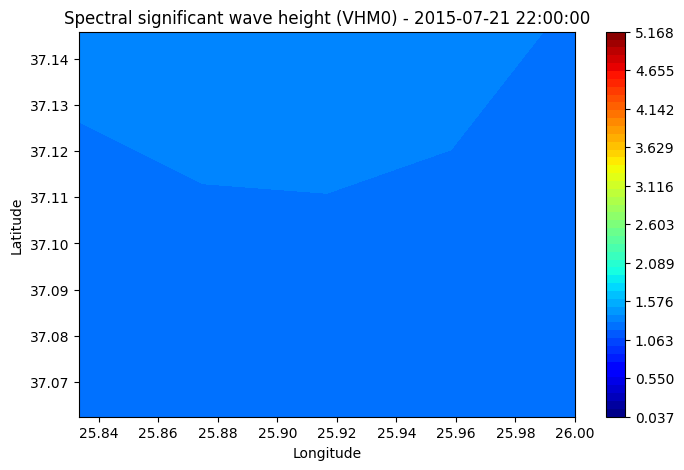

In [26]:
time_stamp = 500

plt.figure(figsize=(8,5))

# Add label and titile of figure
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Spectral significant wave height (VHM0) - {timestring(time[time_stamp])}")

contourf = plt.contourf(np.array(lon_array), np.array(lat_array), vhm0_array[time_stamp], cmap='jet', levels=np.linspace(vhm0_min, vhm0_max, num=50))
plt.colorbar(contourf, extend='both', ticks=np.linspace(vhm0_min, vhm0_max, num=11))  # Use ticks for better readability

# Show the plot
plt.show()


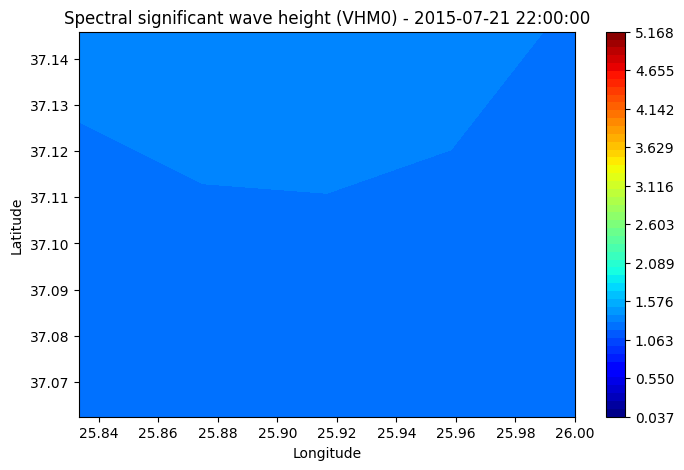

In [27]:
time_stamp = 500

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 5))

# Add label and title to the plot
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title(f"Spectral significant wave height (VHM0) - {timestring(time[time_stamp])}")

# Create a contour plot
contourf = ax.contourf(np.array(lon_array), np.array(lat_array), vhm0_array[time_stamp], cmap='jet', levels=np.linspace(vhm0_min, vhm0_max, num=50))
cbar = fig.colorbar(contourf, ax=ax, extend='both', ticks=np.linspace(vhm0_min, vhm0_max, num=11))  # Use ticks for better readability

# Show the plot
plt.show()

C:\Users\panagop\AppData\Local\Temp\ipykernel_501840\1217090141.py:14: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  cs = m.pcolor(xi,yi,vhm0_array[time_stamp])


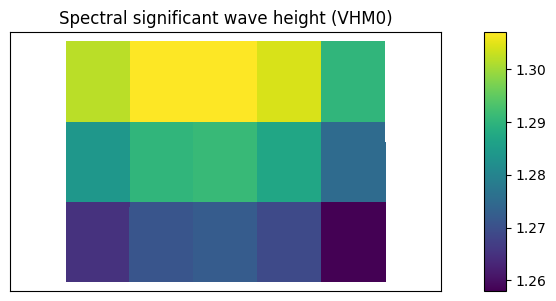

In [18]:
# Get some parameters for the Stereographic Projection
lon_0 = lon_array.mean()
lat_0 = lat_array.mean()

m = Basemap(width=25000,height=15000,
            resolution='l',projection='stere',\
            lat_ts=20,lat_0=lat_0,lon_0=lon_0)

# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lon_array, lat_array)
xi, yi = m(lon, lat)

# Plot Data
cs = m.pcolor(xi,yi,vhm0_array[time_stamp])

# Add Coastlines
m.drawcoastlines()

# Add Colorbar
cbar = m.colorbar(cs, location='right', pad="10%")
# cbar.set_label(tmax_units)

# Add Title
plt.title('Spectral significant wave height (VHM0)')

plt.show()

In [19]:
# Define the file name for the animated GIF
gif_filename = "animated_map.gif"

# Create a list to store the file names of the saved images
image_files = []

# Loop through each time stamp
for time_stamp in range(20):
    # Create a new plot
    plt.figure(figsize=(8, 5))
    
    # Add label and title of the figure
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title(f"Spectral significant wave height (VHM0) - {timestring(time[time_stamp])}")
    
    # Plot contourf with vhm0_array at the current time stamp
    contourf = plt.contourf(np.array(lon_array), np.array(lat_array), vhm0_array[time_stamp], cmap='jet', levels=np.linspace(vhm0_min, vhm0_max, num=50))
    plt.colorbar(contourf, extend='both', ticks=np.linspace(vhm0_min, vhm0_max, num=11))  # Use ticks for better readability
        
    # Save the current plot as an image with a unique file name
    image_file = f"out/time_stamp_{time_stamp}.png"
    plt.savefig(image_file)
    
    # Close the current plot to free up memory
    plt.close()
    
    # Append the file name to the list of image files
    image_files.append(image_file)

# Use imageio to create an animated GIF from the saved images
with imageio.get_writer(gif_filename, mode='I') as writer:
    for image_file in image_files:
        image = imageio.imread(image_file)
        writer.append_data(image)

# Print a message indicating the creation of the animated GIF
print(f"Animated GIF '{gif_filename}' has been created successfully.")


C:\Users\panagop\AppData\Local\Temp\ipykernel_501840\3008647779.py:34: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_file)


Animated GIF 'animated_map.gif' has been created successfully.


In [20]:
def timestring(time):
    return datetime.fromtimestamp(time).strftime('%Y-%m-%d %H:%M:%S')

In [21]:
tmp_time = datetime.fromtimestamp(time[22])
tmp_time.year, tmp_time.month, tmp_time.day, tmp_time.hour


(2015, 7, 2, 0)

In [22]:
print(timestring(time[23]))

2015-07-02 01:00:00


In [17]:
lat.min()

AttributeError: NetCDF: Attribute not found